# <u>Exploratory Data Analysis</u> (EDA)
* Objective: Understand data using statistics and visualizations.
* Tools: Pandas, Matplotlib, Seaborn, Plotly

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

* 1. Import necessary libraries

In [2]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

* 2. Check first 5 Rows

In [4]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

* 3. Basic info

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


* Statistical summary

In [6]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   714.000000  891.000000 

* 4. Histogram of numeric features


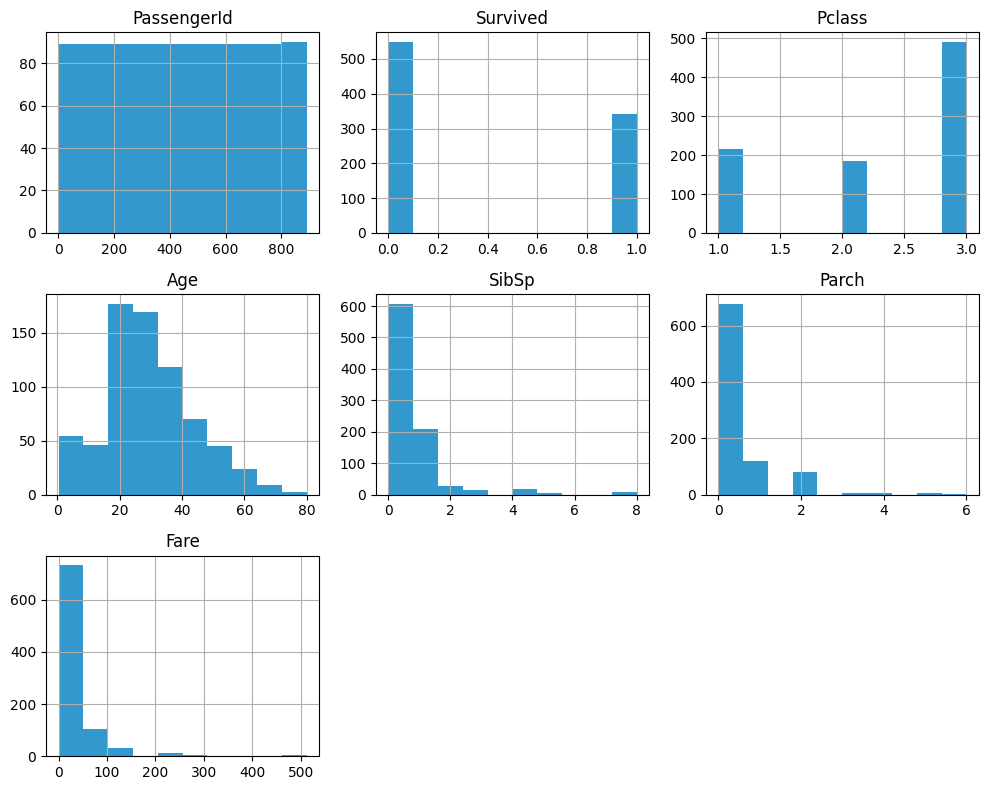

In [14]:
df.hist(figsize=(10, 8), color=(0.2, 0.6, 0.8))
plt.tight_layout()
plt.show()

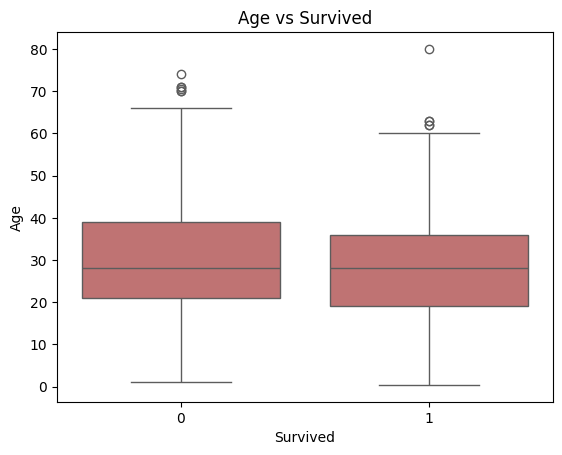

In [15]:
sns.boxplot(x='Survived', y='Age', data=df, color=(0.8, 0.4, 0.4))
plt.title("Age vs Survived")
plt.show()

* 5. Boxplots

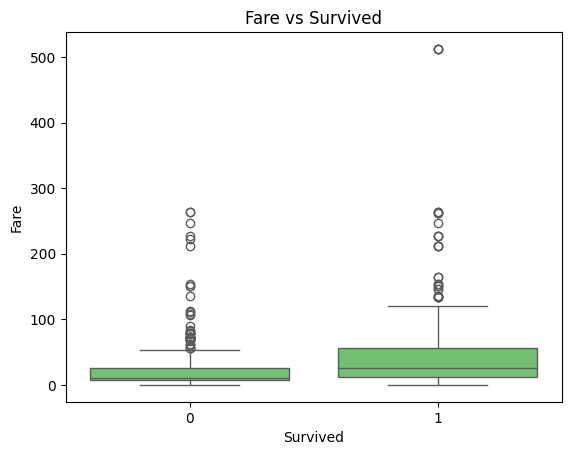

In [16]:
sns.boxplot(x='Survived', y='Fare', data=df, color=(0.4, 0.8, 0.4))
plt.title("Fare vs Survived")
plt.show()

* 6. Correlation matrix

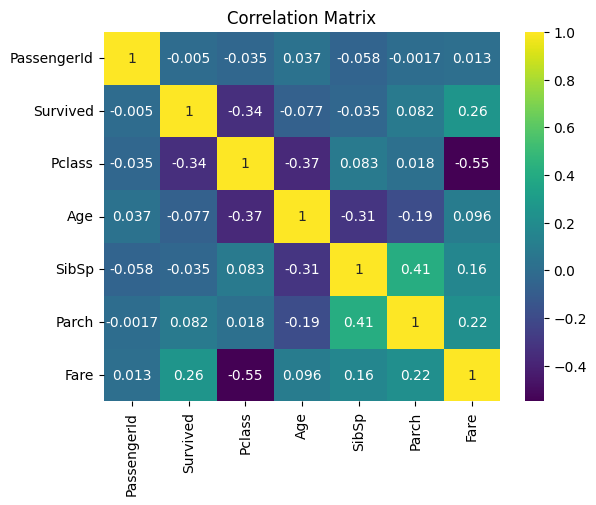

In [20]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

* 7. Pairplot

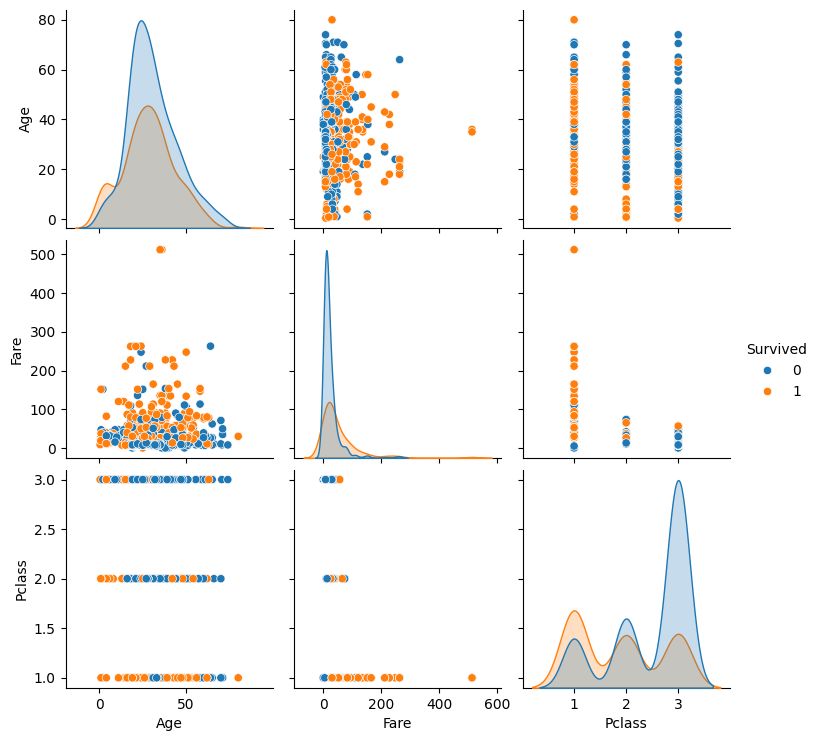

In [11]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']].dropna(), hue='Survived')
plt.show()

- 8. Create a new feature for family size  

In [23]:
df['FamilySize'] = df['SibSp'] + df['Parch']

- 9. Set plot style  

In [24]:
sns.set(style="whitegrid")

- 10. Create a figure with multiple subplots to explore patterns and trends  

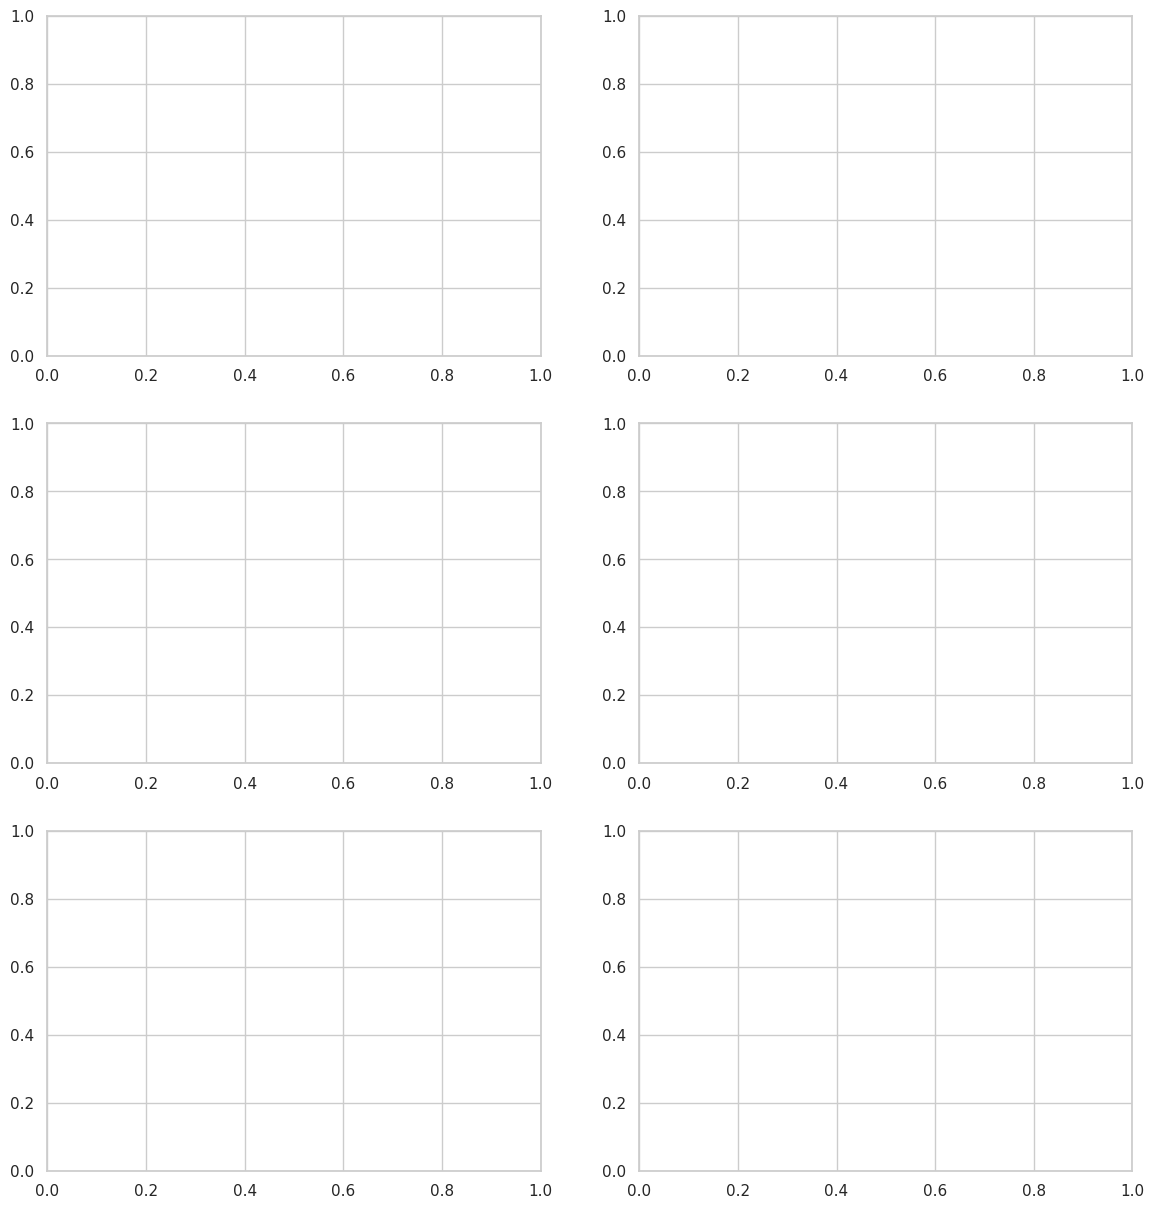

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

- Survival by Sex

In [26]:
sns.countplot(x='Survived', hue='Sex', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Survival Count by Sex')

Text(0.5, 1.0, 'Survival Count by Sex')

- Survival by Passenger Class

In [27]:
sns.countplot(x='Survived', hue='Pclass', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Survival Count by Passenger Class')

Text(0.5, 1.0, 'Survival Count by Passenger Class')

- Age distribution by survival

In [28]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution by Survival')

Text(0.5, 1.0, 'Age Distribution by Survival')

- Fare distribution by survival (boxplot to show outliers)

In [29]:
sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution by Survival')

Text(0.5, 1.0, 'Fare Distribution by Survival')

- Family Size effect on survival

In [30]:
sns.countplot(x='FamilySize', hue='Survived', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Survival Count by Family Size')

Text(0.5, 1.0, 'Survival Count by Family Size')

- 11. Missing values count per feature (bar plot for anomaly detection)

In [31]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
missing_counts.plot(kind='bar', ax=axes[2, 1])
axes[2, 1].set_title('Missing Values per Feature')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>